<a href="https://colab.research.google.com/github/IndraP24/FSDL-21-Codes-and-Lab/blob/main/lab2/notebooks/02_look_at_emnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Looking at EMNIST data

In [2]:
!nvidia-smi

Thu May 20 15:33:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# FSDL GitHub repository setup
%cd ~
!git clone https://github.com/full-stack-deep-learning/fsdl-text-recognizer-2021-labs
%cd fsdl-text-recognizer-2021-labs
!git checkout lab2

!pip install pytorch_lightning wandb
%env PYTHONPATH=.:$PYTHONPATH

/root
Cloning into 'fsdl-text-recognizer-2021-labs'...
remote: Enumerating objects: 791, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 791 (delta 161), reused 141 (delta 141), pack-reused 568
Receiving objects: 100% (791/791), 18.88 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (399/399), done.
/root/fsdl-text-recognizer-2021-labs
     |████████████████████████████████| 808kB 4.1MB/s 
     |████████████████████████████████| 1.8MB 35.5MB/s 
     |████████████████████████████████| 829kB 36.3MB/s 
     |████████████████████████████████| 276kB 35.2MB/s 
     |████████████████████████████████| 645kB 38.1MB/s 
     |████████████████████████████████| 112kB 35.9MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 133kB 36.0MB/s 
     |████████████████████████████████| 174kB 35.4MB/s 
     |████████████████████████████████| 1.3MB 34.9MB/s 
     |█████████████████████████████

In [4]:
%cd lab2/

/root/fsdl-text-recognizer-2021-labs/lab2


In [6]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data.emnist import EMNIST

In [7]:
data = EMNIST()
data.prepare_data()
data.setup()
print(data)

0.00B [00:00, ?B/s]

709MB [00:35, 21.0MB/s]                           


Computing SHA-256...
Unzipping EMNIST...
Loading training data from .mat file
Balancing classes to reduce amount of data
Saving to HDF5 in a compressed format...
Saving essential dataset parameters to text_recognizer/datasets...
Cleaning up...
EMNIST Dataset
Num classes: 83
Mapping: ['<B>', '<S>', '<E>', '<P>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '?']
Dims: (1, 28, 28)
Train/val/test sizes: 260212, 65054, 53988
Batch x stats: (torch.Size([128, 1, 28, 28]), torch.float32, tensor(0.), tensor(0.1726), tensor(0.3305), tensor(1.))
Batch y stats: (torch.Size([128]), torch.int64, tensor(4), tensor(65))



In [8]:
x, y = next(iter(data.test_dataloader()))
print(x.shape, x.dtype, x.min(), x.mean(), x.std(), x.max())
print(y.shape, y.dtype, y.min(), y.max())

torch.Size([128, 1, 28, 28]) torch.float32 tensor(0.) tensor(0.2215) tensor(0.3603) tensor(1.)
torch.Size([128]) torch.int64 tensor(4) tensor(4)


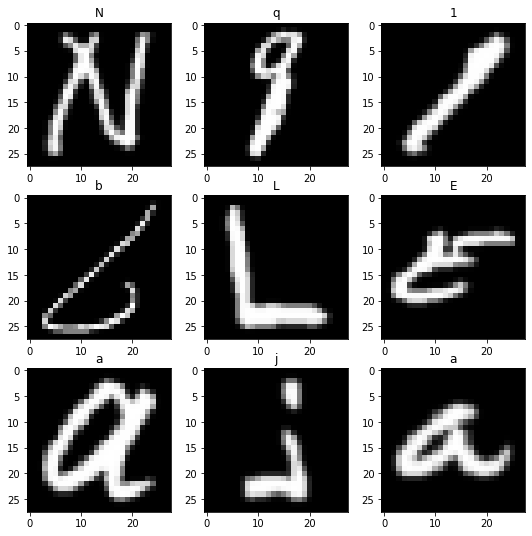

In [9]:
fig = plt.figure(figsize=(9, 9))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    rand_i = np.random.randint(len(data.data_test))
    image, label = data.data_test[rand_i]
    ax.imshow(image.reshape(28, 28), cmap='gray')
    ax.set_title(data.mapping[label])

## Train a CNN model

In [10]:
import pytorch_lightning as pl
from text_recognizer.models import CNN
from text_recognizer.lit_models import BaseLitModel

model = CNN(data_config=data.config())
lit_model = BaseLitModel(model=model)
trainer = pl.Trainer(gpus=1, max_epochs=5)
trainer.fit(lit_model, datamodule=data)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type     | Params
---------------------------------------
0 | model     | CNN      | 1.7 M 
1 | train_acc | Accuracy | 0     
2 | val_acc   | Accuracy | 0     
3 | test_acc  | Accuracy | 0     
---------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.616     Total estimated model params size (MB)


In [11]:
x, y = next(iter(data.test_dataloader()))

logits = model(x)  # (B, C)
print(logits.shape)

preds = logits.argmax(-1)

print(y, preds)


torch.Size([128, 83])
tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4]) tensor([28,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4, 28,  4,  4,  4,  4,  4,  4, 28,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        28, 28,  4,  4, 28,  4,  4, 28,  4,  4,  4,  4,  4,  4,  4, 28,  4,  4,
         4, 28,  4,  4,  4,  4,  4, 28, 28, 28,  4, 28, 28,  4,  4,  4,  4,  4,
         4, 28,  4,  4, 28,  4,  4, 28,  4,  4, 28,  4,  4,  4,  4,  4, 28,  4,
         4,  4,  4,  4,  4, 28,  4,  4,  4, 54,  4,  4,  4,  4,  4,  4,  4, 28,
         4,  4,  4,  4,  4,  4, 17,  4,  4, 28,  4,  4,  4,  4,  

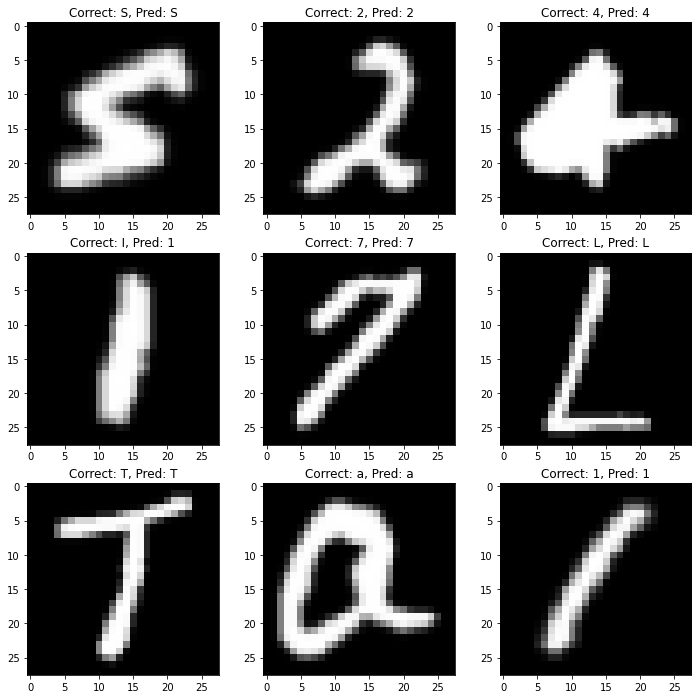

In [13]:

fig = plt.figure(figsize=(12, 12))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    rand_i = np.random.randint(len(data.data_test))
    image, label = data.data_test[rand_i]

    image_for_model = image.unsqueeze(0)  # (1, 1, 28, 28)
    logits = model(image_for_model)  # (1, C)
    pred_ind = logits.argmax(-1)  # (1, )
    pred_label = data.mapping[pred_ind]

    ax.imshow(image.reshape(28, 28), cmap='gray')
    ax.set_title(f'Correct: {data.mapping[label]}, Pred: {pred_label}')


In [17]:
!python3 training/run_experiment.py --max_epochs=50 --gpus=1 --num_workers=4 --data_class=EMNIST --model_class=CNN --overfit_batches=2

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2021-05-20 16:01:17.244707: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

   | Name             | Type      | Params
------------------------------------------------
0  | model            | CNN       | 1.7 M 
1  | model.conv1      | ConvBlock | 640   
2  | model.conv1.conv | Conv2d    | 640   
3  | model.conv1.relu | ReLU      | 0     
4  | model.conv2      | ConvBlock | 36.9 K
5  | model.conv2.conv | Conv2d    | 36.9 K
6  | model.conv2.relu | ReLU      | 0     
7  | model.dropout    | Dropout   | 0     
8  | model.max_pool   | MaxPool2d | 0     
9  | model.fc1        | Linear    | 1.6 M 
10 | model.fc2        | Linear    | 10.7 K
11 | train_acc        | Accuracy  | 0     
12 | val_acc          | Accuracy  | 0     
13 | test_acc         | Accuracy  | 0     
--------------------------------------------